# **_To do list_**

# - numerical method stability analysis
# - numerical method accuracy analysis



---

# _**The Lorenz System**_


---


## **Abstract**
This paper investigates the Lorenz system, a set of nonlinear differential equations that serve as a foundational model in the study of dynamical systems. Beginning with a discussion of the system's mathematical formulation and its physical origins in fluid convection, we explore the behavior of the system under varying parameter conditions. Through numerical simulations, we analyze key features such as equilibrium points, stability, and bifurcation phenomena, which reveal the system's transition between different dynamic regimes. Special attention is given to the emergence of chaos, highlighting the system's sensitivity to initial conditions and the underlying mechanisms that lead to unpredictable behavior. The study is supported by a series of plots and animations that visualize the system's trajectories, bifurcation diagrams, and phase space dynamics. These results provide both qualitative and quantitative insights into the Lorenz system, demonstrating its role as a rich and instructive example of nonlinear dynamics and chaos theory.

---


## **History of the Lorenz System**

In 1961, Edward Lorenz was using a Royal McBee LGP-30, a simple digital computer, to simulate weather patterns by modeling twelve variables such as temperature and wind speed. In an effort to save time, he decided to restart a simulation from a point in the middle of the data, using a printout that represented the conditions at that point. However, he was surprised to find that the weather predictions diverged significantly from the previous run. The reason for this discrepancy was a small error introduced by rounding: the computer worked with six-digit precision, but the printout rounded the variables to three digits. For example, a value like $0.506127$ was printed as $0.506$. While the difference appeared negligible, it led to drastically different results in the long-term simulation.

Lorenz's discovery demonstrated that even small changes in initial conditions could result in significantly different outcomes over time, a phenomenon that later became central to chaos theory. His work, assisted by Ellen Fetter, culminated in his seminal 1963 paper, *Deterministic Nonperiodic Flow*, published in the *Journal of the Atmospheric Sciences*. In this paper, Lorenz laid the foundation for chaos theory, asserting:

_"Two states differing by imperceptible amounts may eventually evolve into two considerably different states ... If, then, there is any error whatever in observing the present state—and in any real system such errors seem inevitable—an acceptable prediction of an instantaneous state in the distant future may well be impossible. In view of the inevitable inaccuracy and incompleteness of weather observations, precise very-long-range forecasting would seem to be nonexistent."_

Lorenz further developed the idea of the "butterfly effect" in 1969, illustrating how small changes in initial conditions could lead to large, unpredictable consequences. His work fundamentally reshaped our understanding of deterministic systems and weather forecasting, establishing that precise long-term predictions are inherently limited by the sensitivity of initial conditions.

---


## **Introduction**

The Lorenz system consists of three coupled, nonlinear ordinary differential equations that model simplified fluid convection. Initially designed to investigate atmospheric processes, the system has since become a cornerstone in the study of nonlinear dynamics. It illustrates how deterministic systems, despite following fixed rules, can produce complex and unpredictable behavior. By analyzing the interactions between its variables, the Lorenz system highlights the sensitivity of dynamical systems to small changes in initial conditions. This paper explores the mathematical structure, key characteristics, and behaviors of the Lorenz system, emphasizing its relevance in the broader field of dynamical systems.


### **Equations**
The equations governing the Lorenz system are: 
 $$\begin{cases} \dot{x}​=σ(y−x), \\ \dot{y}=x(ρ−z)−y, \\ \dot{z}=xy−βz. \end{cases}$$ 
 Here $x$, $y$, and $z$ represent the system's state variables, and $\sigma$, $\rho$, and $\beta$ are real positive parameters. Typically, $\sigma$ represents the Prandtl number, $\rho$ is the Rayleigh number, and $\beta$ is a geometric factor.

 ---


# **_Part 1: Definitions_**
Before we get to the fun stuff, we need to lay down some definitions.

---


## **_Equilibrium Points_**

In the context of dynamical systems, **equilibrium points** (also known as critical points, fixed points, or stationary points) are defined as the points in the phase space where the system remains at rest if initially placed there. Mathematically, these are the solutions to the equation:

$$
\dot{x} = f(x) = 0
$$

where:

- $x \in \mathbb{R}^n$: The state vector of the system.
- $f(x)$: A vector-valued function that defines the dynamics of the system.
- $\dot{x}$: The time derivative of $x$.

---

### **Properties of Equilibrium Points**
1. **Existence**: An equilibrium point $x^*$ exists if there is at least one solution to the equation $f(x^*) = 0$.
2. **Stability**:
   - **Stable (Lyapunov Stable)**: An equilibrium point $x^*$ is stable if, for every $\epsilon > 0$, there exists a $\delta > 0$ such that whenever $\|x(0) - x^*\| < \delta$, it follows that $\|x(t) - x^*\| < \epsilon$ for all $t \geq 0$.
   - **Asymptotically Stable**: An equilibrium point $x^*$ is asymptotically stable if it is stable and $\|x(t) - x^*\| \to 0$ as $t \to \infty$.
   - **Exponentially Stable**: An equilibrium point $x^*$ is exponentially stable if there exist constants $c > 0$ and $\lambda > 0$ such that $\|x(t) - x^*\| \leq c e^{-\lambda t}$ for all $t \geq 0$.
   - **Unstable**: An equilibrium point $x^*$ is unstable if it is not stable.

   ---


### **Classification of Equilibrium Points**
Equilibrium points can be classified based on the behavior of the system near these points. This is typically analyzed using techniques such as:

- **Linearization**: Approximating $f(x)$ near $x^*$ by its Jacobian $\mathbf{J} = \frac{\partial f}{\partial x} \big|_{x^*}$. The eigenvalues of $\mathbf{J}$ determine the local behavior.
- **Nonlinear Analysis**: Using Lyapunov functions or other methods for systems where linearization is insufficient.

Equilibrium points provide critical insights into the qualitative behavior of dynamical systems and their long-term evolution.

---


### **Calculating Equilibrium Points**
$$
\begin{cases}
\dot{x} = \sigma (y - x) = 0, \\
\dot{y} = x(\rho - z) - y = 0, \\
\dot{z} = xy - \beta z = 0; \\
\end{cases}
\implies
\begin{cases}
x = y, \\
x = \pm \sqrt{\beta z}, \\
x (\rho - z - 1) = 0; \\
\end{cases}
\implies
\begin{cases}
x^*_1 = (0, 0, 0), \\
x^*_2 = (\sqrt{\beta (\rho - 1)}, \; \sqrt{\beta (\rho - 1)}, \; \rho - 1), \quad \rho \geq 1; \\
x^*_3 = (-\sqrt{\beta (\rho - 1)}, \; -\sqrt{\beta (\rho - 1)}, \; \rho - 1), \quad \rho \geq 1. \\
\end{cases}
$$

---

### **Calculating the Stability of Equilibrium Points**
The Jacobian matrix $\mathbf{J}$ is given by:
$$
\mathbf{J} = 
\begin{bmatrix}
\frac{\partial \dot{x}}{\partial x} & \frac{\partial \dot{x}}{\partial y} & \frac{\partial \dot{x}}{\partial z} \\
\frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} & \frac{\partial \dot{y}}{\partial z} \\
\frac{\partial \dot{z}}{\partial x} & \frac{\partial \dot{z}}{\partial y} & \frac{\partial \dot{z}}{\partial z}
\end{bmatrix} =
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix}
$$

#### **Stability of $x^*_1 = (0, 0, 0)$:**

At $x^*_1 = (0, 0, 0)$, the Jacobian matrix is:
$$
\mathbf{J}(0, 0, 0) = 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{bmatrix}
$$

The characteristic equation is:
$$
\text{det}(\mathbf{J} - \lambda \mathbf{I}) = 
\text{det} \left( 
\begin{bmatrix}
-\sigma - \lambda & \sigma & 0 \\
\rho & -1 - \lambda & 0 \\
0 & 0 & -\beta - \lambda
\end{bmatrix}
\right) = 0
$$

Now, calculate the determinant:
$$
\text{det} \left( 
\begin{bmatrix}
-\sigma - \lambda & \sigma & 0 \\
\rho & -1 - \lambda & 0 \\
0 & 0 & -\beta - \lambda
\end{bmatrix}
\right)
= (-\beta - \lambda) \cdot \text{det} \begin{bmatrix} -\sigma - \lambda & \sigma \\ \rho & -1 - \lambda \end{bmatrix}
$$

Thus, the characteristic equation becomes:
$$
(\lambda + \beta)(\lambda^2 + (\sigma + 1)\lambda + (\sigma - \sigma \rho)) = 0
$$

The solutions are:
$$
\begin{cases}
\lambda_1 = -\beta, \quad \text{(negative)}; \\
\lambda_2 = \frac{-(\sigma + 1) - \sqrt{(\sigma + 1)^2 - 4(\sigma - \sigma \rho)}}{2}, \quad \text{(negative)}; \\
\lambda_3 = \frac{-(\sigma + 1) + \sqrt{(\sigma + 1)^2 - 4(\sigma - \sigma \rho)}}{2}, \quad \text{(negative for }\rho < 1, \text{ positive for } \rho > 1); \\
\end{cases}
$$

Thus, the point $x^*_1 = (0, 0, 0)$ is stable for $\rho < 1$ and unstable for $\rho > 1$.

---

### **Stability of $x^*_2 = (\sqrt{\beta (\rho - 1)}, \; \sqrt{\beta (\rho - 1)}, \; \rho - 1)$, for $\rho \geq 1$:**

We first calculate the Jacobian matrix $\mathbf{J}$ at $x^*_2$:
$$
\mathbf{J} = 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix}
$$

At $x^*_2 = (\sqrt{\beta (\rho - 1)}, \; \sqrt{\beta (\rho - 1)}, \; \rho - 1)$, the Jacobian matrix becomes:
$$
\mathbf{J}(x^*_2) = 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - (\rho - 1) & -1 & -\sqrt{\beta (\rho - 1)} \\
\sqrt{\beta (\rho - 1)} & \sqrt{\beta (\rho - 1)} & -\beta
\end{bmatrix}
= 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
1 & -1 & -\sqrt{\beta (\rho - 1)} \\
\sqrt{\beta (\rho - 1)} & \sqrt{\beta (\rho - 1)} & -\beta
\end{bmatrix}
$$

The characteristic equation for the Jacobian is:
$$
\text{det}(\mathbf{J} - \lambda \mathbf{I}) = 0
$$

Now, calculate the determinant of the matrix:
$$
\text{det} \left( 
\begin{bmatrix}
-\sigma - \lambda & \sigma & 0 \\
1 & -1 - \lambda & -\sqrt{\beta (\rho - 1)} \\
\sqrt{\beta (\rho - 1)} & \sqrt{\beta (\rho - 1)} & -\beta - \lambda
\end{bmatrix}
\right) = 0
$$

Solving this determinant yields the characteristic polynomial:
$$
(\lambda + \beta)(\lambda^2 + (\sigma + 1)\lambda + (\sigma - \sigma \rho - \sqrt{\beta (\rho - 1)})) = 0
$$

For $\rho \geq 1$, the stability of $x^*_2$ depends on the signs of the eigenvalues:
- The equilibrium point is stable if the real parts of all eigenvalues are negative.
- The equilibrium point is unstable if any eigenvalue has a positive real part.

---

### **Stability of $x^*_3 = (-\sqrt{\beta (\rho - 1)}, \; -\sqrt{\beta (\rho - 1)}, \; \rho - 1)$, for $\rho \geq 1$:**

Next, we calculate the Jacobian matrix at $x^*_3 = (-\sqrt{\beta (\rho - 1)}, \; -\sqrt{\beta (\rho - 1)}, \; \rho - 1)$:

$$
\mathbf{J}(x^*_3) = 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix}
$$

At $x^*_3 = (-\sqrt{\beta (\rho - 1)}, \; -\sqrt{\beta (\rho - 1)}, \; \rho - 1)$, the Jacobian matrix becomes:
$$
\mathbf{J}(x^*_3) = 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - (\rho - 1) & -1 & \sqrt{\beta (\rho - 1)} \\
-\sqrt{\beta (\rho - 1)} & -\sqrt{\beta (\rho - 1)} & -\beta
\end{bmatrix}
= 
\begin{bmatrix}
-\sigma & \sigma & 0 \\
1 & -1 & \sqrt{\beta (\rho - 1)} \\
-\sqrt{\beta (\rho - 1)} & -\sqrt{\beta (\rho - 1)} & -\beta
\end{bmatrix}
$$

The characteristic equation is again:
$$
\text{det}(\mathbf{J} - \lambda \mathbf{I}) = 0
$$

Now, solving the determinant yields the characteristic polynomial:
$$
(\lambda + \beta)(\lambda^2 + (\sigma + 1)\lambda + (\sigma - \sigma \rho - \sqrt{\beta (\rho - 1)})) = 0
$$

For $\rho \geq 1$, the equilibrium point $x^*_3$ is stable if all eigenvalues have negative real parts and unstable if any eigenvalue has a positive real part.

---

### **Conclusion:**
- For $x^*_1 = (0, 0, 0)$, the stability is dependent on $\rho$. It is stable for $\rho < 1$ and unstable for $\rho > 1$.
- For $x^*_2 = (\sqrt{\beta (\rho - 1)}, \; \sqrt{\beta (\rho - 1)}, \; \rho - 1)$, the stability depends on the eigenvalues, and it is stable if all eigenvalues have negative real parts.
- For $x^*_3 = (-\sqrt{\beta (\rho - 1)}, \; -\sqrt{\beta (\rho - 1)}, \; \rho - 1)$, the stability is similar to $x^*_2$.

This solution provides all the calculations, eigenvalue solutions, and stability conditions for each equilibrium point in the system. Let me know if any further modifications are needed!

---

## _**Bifurcation Diagram**_
A bifurcation diagram is a tool used to visualize how the steady-state behavior of a system changes as a parameter is varied. In the case of the Lorenz system, we can look at the last value of $x$ as a function of $\rho$ after the system has reached its steady state for each value of $\rho$.

**Bifurcation Points**: These are points where the behavior of the system changes qualitatively. For instance:
   - **Saddle-node bifurcations**: Two equilibrium points merge and annihilate each other.
   - **Period doubling**: The system exhibits periodic oscillations at certain intervals of $\rho$.

### **Steps in the Bifurcation Diagram**:
1. **Integration of the Lorenz System**: For each value of $\rho$, we numerically solve the system of equations, using a set of initial conditions (e.g., $x = 1.0, y = 0.0, z = 0.0$).
2. **Capture the Long-term Behavior**: After integrating for a period of time, we extract the final state of $x$ to observe the system's behavior.
3. **Visualization**: Plot the values of $x$ for each $\rho$ to create a bifurcation diagram that shows the transitions between different states (stable, oscillatory, chaotic).


---

## **Plotting the bifurcation diagram**

For plotting the bifurcation diagram, we will use the library Seaborn. The bifurcation diagram will show the values of $x$ for different values of $\rho$. The code below will generate the bifurcation diagram for the Lorenz system. We will aslo use the odeint function from scipy to solve the Lorenz system of equations. Later in this paper we will provide our own implementation of a numerical ODE system solver.



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint


def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def plot_bifurcation_diagram():
    sigma = 10.0
    beta = 8/3
    rho_values = np.linspace(0, 60, 500)
    initial_conditions = [1.0, 0.0, 0.0]

    x_vals = [odeint(lorenz, initial_conditions, np.linspace(0, 100, 10000), args=(sigma, rho, beta))[-1, 0] for rho in rho_values]

    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(12, 7))

    sns.scatterplot(
        x=rho_values, 
        y=x_vals, 
        s=8, 
        color="mediumblue", 
        alpha=0.8, 
        edgecolor=None
    )

    plt.xlabel(r'$\mathbf{\rho}$', fontsize=14, labelpad=10)
    plt.ylabel(r'$\mathbf{x}$', fontsize=14, labelpad=10)
    plt.title('Bifurcation Diagram of the Lorenz System', fontsize=16, weight='bold', pad=15)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.8)
    sns.despine()


    # Fancy annotation with a red, tilted arrow (path style)
    plt.annotate(
        r'$\rho = 1$', 
        xy=(1, 0),  # The point at which the annotation begins
        xytext=(50, -50),  # Adjusted text position below the point (to the left)
        textcoords='offset points',
        fontsize=14,  # Larger font size
        color='red',  # Red color for the text
        weight='bold',  # Bold text for emphasis
        rotation=0,  # Rotate to tilt the annotation the other way
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        arrowprops=dict(
            facecolor='red',  # Red arrow color
            edgecolor='red',  # Arrow border color
            shrink=0.1,  # Shrinks the arrow a little for balance
            width=1.5,  # Arrow width
            headwidth=10,  # Size of the arrowhead
            headlength=15,  # Length of the arrowhead
            linestyle='-',  # Solid line for the arrow
            connectionstyle="arc3,rad=-0.4"  # Smooth curved arrow, tilted to the left
        ),
    )


    plt.show()


---

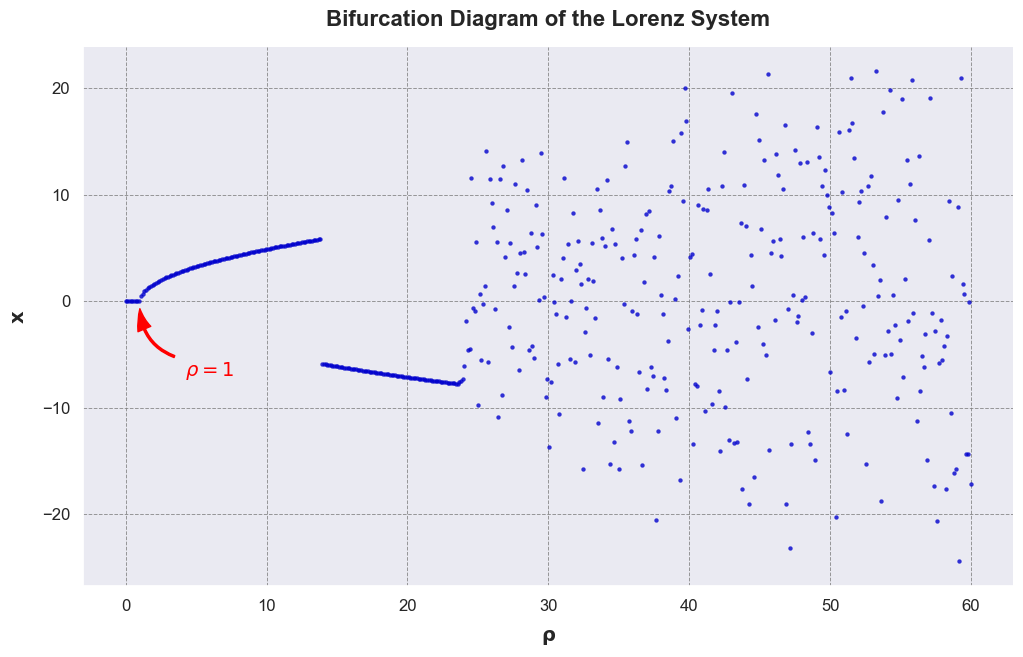

In [33]:
plot_bifurcation_diagram()

---

### **Conclusions from Bifurcation Analysis**

From the bifurcation diagram, we can observe the following key transitions in the Lorenz system as the control parameter $\rho$ varies:

1. **Stability of Equilibrium Points:**
   - **For $\rho < 1$:**
     The system is characterized by a single stable equilibrium point $x^*_1 = (0, 0, 0)$. In this region, the Lorenz system exhibits steady behavior, and the trajectory remains near the origin.
   - **At $\rho = 1$:**
     The equilibrium point $x^*_1 = (0, 0, 0)$ becomes unstable, and two new equilibrium points $x^*_2$ and $x^*_3$ emerge. These points represent the symmetric stable states, marking a significant bifurcation.
   - **For $\rho > 1$:**
     Two stable equilibrium points, $x^*_2$ and $x^*_3$, persist, and the system transitions into more complex behaviors. The equilibrium points shift and become periodic as $\rho$ increases.

2. **Transition to Chaos:**
   - As $\rho$ increases further, the system exhibits periodic behavior at first, with distinct branches in the bifurcation diagram. These branches eventually give way to chaotic behavior, which becomes evident in the diagram as irregular, scattered points.
   - **For $\rho \approx 24$:**
     The system begins to exhibit chaotic behavior, marked by a shift from periodic orbits to erratic and sensitive trajectories. This transition indicates the system's sensitivity to initial conditions, a defining characteristic of chaotic systems.

3. **Onset of Bifurcations:**
   - The bifurcation diagram clearly shows several **period-doubling bifurcations** leading to chaos. This is observed as the values of the equilibrium points become increasingly erratic and complex as $\rho$ increases.
   - **Pitchfork bifurcation** occurs at $\rho = 1$, where the previously single equilibrium point $x^*_1 = (0, 0, 0)$ splits into two stable points, $x^*_2$ and $x^*_3$.

4. **Key Observations:**
   - As the parameter $\rho$ crosses the critical value of 1, the system transitions from a stable state to more complex behavior, including periodic and eventually chaotic dynamics.
   - The appearance of chaotic attractors at higher $\rho$ values signifies the system’s sensitivity to initial conditions and non-linear dynamics.

### **Overall Conclusion:**
The bifurcation analysis of the Lorenz system reveals a dramatic shift in its dynamics as $\rho$ is varied. Initially, the system exhibits stable behavior, but as $\rho$ increases, it undergoes bifurcations, leading to periodic orbits and eventually chaotic behavior. These transitions highlight the non-linear nature of the system and its susceptibility to small changes in $\rho$, making the Lorenz system a classic example of chaos theory in action.



---
## **_Dynamical Systems_**


A **dynamical system** is a mathematical formulation used to describe the time-dependent evolution of a point in a geometrical space. It consists of a set of rules or equations that dictate how the state of the system evolves over time. The state of a dynamical system is represented by a point in a state space, and its evolution is described by a trajectory or orbit within this space.

A dynamical system can be formally defined as a pair $(T, \varphi)$, where:
- $T$ represents time, which may be discrete (e.g., $T = \mathbb{Z}$) or continuous (e.g., $T = \mathbb{R}$),
- $\varphi: T \times X \to X$ is a function that describes the system's evolution, where $X$ is the state space.

For discrete-time dynamical systems, the evolution is governed by difference equations:
$$ x_{n+1} = f(x_n, n), $$
where $x_n \in X$ denotes the state at time step $n$, and $f: X \times \mathbb{Z} \to X$ is a function that determines the evolution.

For continuous-time dynamical systems, the evolution is governed by differential equations:
$$ \dot{x} = f(x, t), $$
where $x \in X$ represents the state vector, $t \in T$ represents time, and $f: X \times T \to X$ is a vector field governing the evolution.

This document primarily focuses on continuous-time dynamical systems.

---

#### **State Space**
The **state space** $X$ is the set of all possible states of the system. In the case of a system describing, for instance, the position and velocity of a moving object, the state space encompasses all possible combinations of position and velocity. For systems governed by ordinary differential equations (ODEs), the state space is typically a vector space or manifold, where each point represents a distinct state of the system.

---


#### **Trajectory**
A **trajectory** (or orbit) of a dynamical system is the path traced by the system as it evolves over time. For a given system of ODEs, this trajectory corresponds to the solution curve of the differential equation:
$$ \dot{x}(t) = f(x(t)), $$
where $x(t)$ represents the state of the system at time $t$.

---

#### **Flow of a System**
The **flow** of a dynamical system, denoted by $\varphi_t(x_0)$, represents the evolution of an initial state $x_0$ under the system's governing dynamics. The flow provides the trajectory of $x_0$ as time progresses:
$$ \varphi_t(x_0) = x(t), $$
where $x_0$ is the initial condition and $x(t)$ is the state of the system at time $t$.


---

#### **Fixed Point**
A **fixed point** $x^*$ (or equilibrium point) is a state where the system remains unchanged. Mathematically, a fixed point satisfies:
$$ \dot{x}(t) = f(x^*) = 0, $$
indicating that the system does not evolve when it is at $x^*$. The stability of a fixed point is determined by the Jacobian matrix $J = Df(x^*)$ evaluated at the fixed point.

---


#### **Stability of Fixed Points**
The **stability** of a fixed point depends on the eigenvalues of the Jacobian matrix $J$. If the real parts of all eigenvalues of $J$ are negative, the fixed point is **stable**, meaning that small perturbations will decay over time. Conversely, if any eigenvalue has a positive real part, the fixed point is **unstable**, meaning that perturbations will grow over time.

---


#### **Linearization**
**Linearization** refers to approximating a nonlinear system by a linear system near a specific point of interest, typically a fixed point or periodic orbit. In the context of ODEs, linearization around a point involves computing the Jacobian matrix of the system at that point. This matrix characterizes the behavior of small perturbations near the point of interest.

---


#### **Jacobian Matrix**
The **Jacobian matrix** $J = Df(x)$ is a matrix of partial derivatives that describes the local behavior of the system around a point. It is used to analyze stability:
$$ J_{ij} = \frac{\partial f_i}{\partial x_j}, $$
where $f_i$ is the $i$-th component of the system's vector field $f(x)$.

---


#### **Eigenvalues of the Jacobian**
The **eigenvalues** of the Jacobian matrix play a central role in determining the stability of a fixed point. If all eigenvalues have negative real parts, the fixed point is stable. If any eigenvalue has a positive real part, the fixed point is unstable.

---


### **Periodic Trajectories**
A **periodic trajectory** $\gamma(t)$ of a dynamical system is a solution to the differential equation
$$ \dot{x}(t) = f(x(t)), $$
such that $\gamma(t + T) = \gamma(t)$ for some period $T > 0$ and for all $t$. This implies that the trajectory repeats itself after time $T$.

---

#### **Linearization Around a Trajectory**
To analyze the behavior of small perturbations near a periodic trajectory, we linearize the system. Let $x(t) = \gamma(t) + \xi(t)$, where $\xi(t)$ represents a small deviation from the periodic orbit. Substituting this into the system and neglecting higher-order terms in $\xi(t)$ results in the **variational equation**:
$$ \dot{\xi}(t) = \frac{\partial f}{\partial x} \big|_{\gamma(t)} \xi(t), $$
where $\frac{\partial f}{\partial x} \big|_{\gamma(t)}$ is the Jacobian matrix of $f(x)$ evaluated along the periodic trajectory $\gamma(t)$.

---


#### **Fundamental Matrix Solution**
A **fundamental matrix solution** $\Xi(t)$ of the variational equation satisfies:
$$ \dot{\Xi}(t) = \frac{\partial f}{\partial x} \big|_{\gamma(t)} \Xi(t), $$
with the initial condition $\Xi(0) = I$, where $I$ is the identity matrix. The columns of $\Xi(t)$ represent independent solutions to the variational equation.

---


#### **Monodromy Matrix**
The **monodromy matrix** $\Phi(T)$ describes the evolution of perturbations over one period $T$ of the periodic trajectory. It is given by:
$$ \Phi(T) = \Xi(T), $$
where $\Xi(T)$ is the fundamental matrix evaluated at time $t = T$. This matrix encapsulates the behavior of small deviations after one complete cycle of the periodic trajectory.

---


#### **Floquet Multipliers**
The **Floquet multipliers** are the eigenvalues of the monodromy matrix $\Phi(T)$. These eigenvalues provide insight into the stability of the periodic trajectory:
1. If all Floquet multipliers, except for the trivial one $\lambda = 1$, have magnitudes less than $1$, the periodic orbit is **stable**.
2. If any Floquet multiplier has a magnitude greater than or equal to $1$ (other than $\lambda = 1$), the periodic orbit is **unstable**.

 **Additional Notes**
1. The trivial Floquet multiplier $\lambda = 1$ exists because perturbations along the periodic trajectory do not grow or decay, reflecting its periodic nature.
2. These concepts are widely employed in the analysis of oscillatory phenomena in systems such as mechanical vibrations, electrical circuits, and biological rhythms.


---
 
#### **Lyapunov Exponent**

The Lyapunov exponent is a measure used to characterize the rate of separation of infinitesimally close trajectories in a dynamical system. It quantifies the sensitivity to initial conditions. Formally, the largest Lyapunov exponent $\lambda_1$ is defined as:

$$
\lambda_1 = \lim_{t \to \infty} \lim_{\delta x(0) \to 0} \frac{1}{t} \ln \frac{|\delta x(t)|}{|\delta x(0)|}
$$

where:
- $\delta x(0)$ is the initial separation between two trajectories.
- $\delta x(t)$ is the separation at time $t$.


The Lyapunov exponents $\lambda_i$ are ordered such that $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$. 

---


#### **Chaotic Behavior**
**Chaos** refers to complex, seemingly unpredictable behavior in a dynamical system, despite the system being deterministic (i.e., governed by specific rules). A chaotic system typically exhibits sensitive dependence on initial conditions, meaning that small changes in initial conditions lead to vastly different outcomes. This is often characterized by a positive **Lyapunov exponent** $\lambda_1 > 0$, which indicates exponential divergence of nearby trajectories.

---


#### **Fractal Dimension**
The **fractal dimension** $d_H$ of an attractor is a measure of its complexity, indicating how it fills the state space. For a **strange attractor**, the Hausdorff dimension $d_H$ exceeds the topological dimension, indicating that the attractor has a highly intricate and irregular structure.

---


#### **Topological Mixing**
A system is said to exhibit **topological mixing** if, for any two open sets $U$ and $V$ on the attractor, there exists a time $T$ such that the trajectory of any point in $U$ will eventually enter $V$. This property suggests that the system's dynamics are sufficiently complex to explore the entire attractor.

---


#### **Ergodic Theory**
In ergodic theory, an **ergodic system** is one in which the long-term time averages of a trajectory coincide with averages taken over the entire state space (with respect to some invariant measure). This property is particularly relevant for chaotic systems, where trajectories are dense in the attractor and exhibit statistical properties.

---




## **_Attractors_**


In the context of dynamical systems, an attractor is a subset $A$ of the phase space $X$ toward which the system evolves over time. Formally, an attractor satisfies the following conditions:
1. **Invariance**: $\varphi_t(A) = A$, where $\varphi_t$ is the evolution map of the dynamical system.
2. **Attractiveness**: There exists a neighborhood $U \subseteq X$ of $A$ such that for all $x \in U$, $\lim_{t \to \infty} \text{dist}(\varphi_t(x), A) = 0$.
3. **Minimality**: No proper subset of $A$ satisfies the above conditions.

Attractors can take various forms, including fixed points, periodic orbits, quasi-periodic tori, and more complex sets like strange attractors.
 
---


### **Types of Attractors**

Attractors in dynamical systems can exhibit diverse behaviors, ranging from stable fixed points to chaotic strange attractors. Below are some common types of attractors.

---

#### 1. **Fixed Point Attractor**
A fixed point $x^*$ satisfies $\varphi_t(x^*) = x^*$ for all $t \geq 0$. Stability is determined by the eigenvalues of the Jacobian matrix $J = Df(x^*)$, where $f$ is the system's flow:
- If all eigenvalues have negative real parts, $x^*$ is a stable attractor.
- **Example**: A damped pendulum at rest.

---
 
#### 2. **Limit Cycle Attractor**
A periodic trajectory $\gamma(t)$ satisfies $\gamma(t + T) = \gamma(t)$ for all $t$, with period $T > 0$. Stability depends on the Floquet multipliers derived from the monodromy matrix:
- If all Floquet multipliers (except one with value $1$) have magnitudes less than $1$, the cycle is stable.
- **Example**: Van der Pol oscillator.

---
 
#### 3. **Torus Attractor**
A toroidal attractor corresponds to quasi-periodic motion  (quasi-periodic motion is motion on a torus that never comes back to the same point), typically arising from incommensurate frequencies $\omega_1, \omega_2, \dots, \omega_n$. The trajectory is given by:
$$
\theta_i(t) = \theta_i(0) + \omega_i t \mod 2\pi,
$$
for $i = 1, \dots, n$.
- **Example**: Coupled oscillators.
---

#### 4. **Strange Attractor**

 
 Strange attractors exhibit fractal structures and chaotic behavior, where trajectories never settle to a point or cycle. These attractors are often found in nonlinear systems. However, before we define strange attractors, let's first introduce the concept of a Lyapunov exponent.


---

### **Mathematical Properties of Strange Attractors**

Strange attractors possess the following defining characteristics:

1. **Fractal Geometry**:  
   The Hausdorff dimension $d_H$ of a strange attractor satisfies $d_H > \text{topological dimension}$. This can be computed using the Lyapunov exponents $\lambda_i$ through the Kaplan-Yorke formula:
   $$
   d_{KY} = k + \frac{\sum_{i=1}^k \lambda_i}{|\lambda_{k+1}|},
   $$
   where $k$ is the largest integer such that $\sum_{i=1}^k \lambda_i \geq 0$.

2. **Sensitive Dependence on Initial Conditions**:  
   For two initial points $x_0$ and $\tilde{x}_0$, the separation $|\varphi_t(x_0) - \varphi_t(\tilde{x}_0)|$ grows exponentially:
   $$
   |\varphi_t(x_0) - \varphi_t(\tilde{x}_0)| \sim e^{\lambda_1 t},
   $$
   where $\lambda_1 > 0$ is the largest Lyapunov exponent.

3. **Topological Mixing**:  
   For any two open sets $U, V \subseteq A$, there exists a $T > 0$ such that for all $t \geq T$, $\varphi_t(U) \cap V \neq \emptyset$. This implies trajectories thoroughly explore the attractor.

4. **Dense Periodic Orbits**:  
   The attractor contains periodic points $x_p$ that are dense, ensuring any point on the attractor is arbitrarily close to a periodic orbit.

---

### **Chaotic Attractors**

Chaotic attractors are a subclass of strange attractors where chaotic behavior is rigorously defined. For a dynamical system with a chaotic attractor, the following hold:
1. **Positive Largest Lyapunov Exponent**:  
   A positive Lyapunov exponent $\lambda_1 > 0$ indicates exponential divergence of nearby trajectories.

2. **Invariant Measures**:  
   There exists an invariant measure $\mu$ supported on the attractor, allowing for statistical properties to be studied. The ergodic nature ensures long-term averages are well-defined.

3. **Deterministic Chaos**:  
   The system's equations are deterministic, yet trajectories appear random due to sensitive dependence.

---


### **_Theorem (Necessary and Sufficient Argument for Chaos)_**
A strange attractor is considered chaotic $\iff \lambda_1 > 0$.

---

### **_Theorem (Divergence of Chaotic Systems)_**

Let $\mathcal{M}$ be a differentiable manifold and $f: \mathcal{M} \rightarrow \mathcal{M}$ be a smooth dynamical system. For a trajectory starting at $x_0 \in \mathcal{M}$, the Lyapunov exponent $\lambda$ characterizes the rate of separation of infinitesimally close trajectories.



**Definition:** For two trajectories initially separated by a small perturbation $\delta Z_0$, their separation $\delta Z(t)$ at time $t$ evolves according to

$$|\delta Z(t)| \approx e^{\lambda t}|\delta Z_0|.$$



**Properties:**
1. The spectrum of Lyapunov exponents $\{\lambda_i\}$ has dimension equal to $\dim(\mathcal{M})$
2. Each $\lambda_i$ measures the exponential divergence rate in a particular direction
3. The maximal Lyapunov exponent (MLE) governs the system's predictability

---


# **_Part 2: The Lorenz Attractor and Chaos Theory_**
### **Compute Pairwise Distances**

For the correlation dimension, we calculate pairwise distances between points in the trajectory. The number of pairs with distances less than a given radius \( r \) is used to compute the correlation sum.

---

## _**Fractal Dimension of the Lorenz Attractor**_

### **Kaplan-Yorke Fractal Dimension**

The fractal dimension of the Lorenz attractor can be estimated using the **Kaplan-Yorke formula**. This formula relates the fractal dimension to the Lyapunov exponents, which measure the rates of divergence or convergence of nearby trajectories in phase space.

Given the ordered Lyapunov exponents $\lambda_1, \lambda_2, \lambda_3$ ($\lambda_1 \geq \lambda_2 \geq \lambda_3$), the Kaplan-Yorke dimension is:

$$
D = k + \frac{\sum_{i=1}^k \lambda_i}{|\lambda_{k+1}|},
$$

where:
- $k$ is the largest integer such that $\sum_{i=1}^k \lambda_i \geq 0$.

For the Lorenz system with typical parameter values ($\sigma = 10, \rho = 28, \beta = \frac{8}{3}$), the Lyapunov exponents are approximately:

$$
\lambda_1 \approx 0.905, \quad \lambda_2 \approx 0.0, \quad \lambda_3 \approx -14.57.
$$

### **Step-by-Step Calculation**

1. Compute the sum of Lyapunov exponents until it becomes negative:
   $$
   \lambda_1 + \lambda_2 = 0.905 + 0.0 = 0.905 \geq 0.
   $$
   The sum becomes negative at $k + 1 = 3$.

2. Use the Kaplan-Yorke formula:
   $$
   D = 2 + \frac{0.905}{|-14.57|}.
   $$

3. Simplify:
   $$
   D \approx 2 + \frac{0.905}{14.57} \approx 2 + 0.0621 = 2.0621.
   $$

Thus, the fractal dimension of the Lorenz attractor is approximately:

$$
D \approx 2.06.
$$
---

## **Interpretation**

The fractal dimension $D$ quantifies the complexity of the Lorenz attractor. A value slightly above 2 indicates that the attractor lies between a two-dimensional surface and a three-dimensional volume in phase space.
 
---

# **_Part 3: Numerical Methods_**

Ordinary differential equations frequently arise in scientific and engineering contexts, where they model the dynamic behavior of systems over time or space. While some ordinary differential equations have exact analytical solutions, many do not, requiring the use of **numerical methods** to obtain approximate solutions.
 


#### **Core Aspects of Numerical Methods**

- **Discrete Computation**: Numerical methods solve ordinary differential equations by evaluating solutions at discrete points, rather than providing a continuous exact solution.
- **Trade-off between Simplicity and Accuracy**: 
  - Simpler methods, such as Euler's method, are easy to implement but often require smaller time steps to achieve acceptable accuracy.
  - More advanced methods, such as the Runge-Kutta method or implicit schemes, offer higher accuracy with fewer steps but involve more complex computations.
 


#### **Objective of This Section**

The purpose of this section is to explore practical numerical approaches for solving systems of ordinary differential equations, particularly when exact solutions are not available. The focus is on methods that effectively balance ease of implementation with computational accuracy, ensuring both accessibility and the capability to solve complex systems.
 
---


### **_The Lorenz System in Python code_**

For implementing ODEs in Python, we define a function that returns the derivatives of the state variables at a given time. We then use a numerical solver, whitch we will define in a momment, to integrate the system forward in time. The following code snippet demonstrates the implementation of the Lorenz system in Python:

In [21]:
import numpy as np



def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])


 
---


### **Forward Euler Method**

The **Forward Euler method** is a simple numerical technique for solving systems of ordinary differential equations. It is an explicit method that calculates the solution at the next time step using the values and derivatives at the current time step.

#### **Formula**

Consider a system of differential equations of the form:

$$ \frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y}), \quad \mathbf{y}(t_0) = \mathbf{y_0} $$

where:

The Forward Euler method approximates the solution for each component of the system as:

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + h \cdot \mathbf{f}(t_n, \mathbf{y}_n) $$

where:
- $ \mathbf{y}_n $ is the vector of solutions at the current step,
- $ h $ is the step size,
- $ \mathbf{f}(t_n, \mathbf{y}_n) $ is the vector of derivatives evaluated at $ t_n $.

#### **Characteristics**

- **Simplicity**: The method is straightforward to implement and easy to understand.
- **Accuracy**: It is a first-order method, meaning the error decreases linearly with the step size.
- **Limitations**: The method requires small step sizes to maintain stability and accuracy, especially for stiff systems.

The Forward Euler method is a useful starting point for solving systems of ordinary differential equations but may not be suitable for all problems due to its limited stability range.

Below, we implement the Forward Euler method for systems in Python.


In [22]:

def forward_euler(f, initial_state, t0, tf, dt, args):
    def f_(t,state, args=args):
        return f(t, state, *args)
    t = np.arange(t0, tf, dt)
    n = len(t)
    states = np.zeros((n, len(initial_state)))
    states[0] = initial_state
    for i in range(n - 1):
        states[i + 1] = states[i] + dt * f_(t[i], states[i])
    return states


 
---


### **Backward Euler Method**

The **Backward Euler method** is an implicit numerical technique for solving systems of ordinary differential equations. Unlike the Forward Euler method, it calculates the solution at the next time step using the values and derivatives at the next time step, requiring the solution of an equation at each step.

#### **Formula**

Consider a system of differential equations of the form:

$$ \frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y}), \quad \mathbf{y}(t_0) = \mathbf{y_0} $$

The Backward Euler method approximates the solution for each component of the system as:

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + h \cdot \mathbf{f}(t_{n+1}, \mathbf{y}_{n+1}) $$

where:
- $ \mathbf{y}_n $ is the vector of solutions at the current step,
- $ h $ is the step size,
- $ \mathbf{f}(t_{n+1}, \mathbf{y}_{n+1}) $ is the vector of derivatives evaluated at the next time step $ t_{n+1} $.

#### **Characteristics**

- **Stability**: The Backward Euler method is more stable than the Forward Euler method, especially for stiff systems.
- **Accuracy**: It is also a first-order method, meaning the error decreases linearly with the step size, but typically requires fewer steps for stability in challenging problems.
- **Implicit Nature**: Unlike the explicit Forward Euler method, the Backward Euler method requires solving an equation at each time step, which can be computationally more expensive.

The Backward Euler method is particularly useful for stiff systems, where it provides better stability than explicit methods, though it may require more computation due to its implicit nature. Below, we implement the Backward Euler method for systems in Python.


In [23]:


def backward_euler(f, initial_state, t0, tf, dt, args):
    def f_(t, state, args=args):
        return f(t, state, *args)
    t = np.arange(t0, tf, dt)
    n = len(t)
    states = np.zeros((n, len(initial_state)))
    states[0] = initial_state
    for i in range(n - 1):
        t_next = t[i] + dt
        state = states[i]
        next_state = state
        next_state = state + dt * f_(t_next, next_state)
        states[i + 1] = next_state
    return states


 
---


### **Runge-Kutta 2nd Order Method**

The **Runge-Kutta 2nd order (RK2) method** is an explicit numerical technique used to solve systems of ordinary differential equations. It improves upon the Forward Euler method by considering both the current and predicted values to estimate the solution at the next time step, offering better accuracy.

#### **Formula**

Consider a system of differential equations of the form:

$$ \frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y}), \quad \mathbf{y}(t_0) = \mathbf{y_0} $$

The RK2 method approximates the solution for each component of the system as:

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + h \cdot \mathbf{f}\left(t_n + \frac{h}{2}, \mathbf{y}_n + \frac{h}{2} \cdot \mathbf{f}(t_n, \mathbf{y}_n)\right) $$

where:
- $ \mathbf{y}_n $ is the vector of solutions at the current step,
- $ h $ is the step size,
- $ \mathbf{f}(t_n, \mathbf{y}_n) $ is the vector of derivatives evaluated at $ t_n $,
- $ \mathbf{f}\left(t_n + \frac{h}{2}, \mathbf{y}_n + \frac{h}{2} \cdot \mathbf{f}(t_n, \mathbf{y}_n)\right) $ is the derivative evaluated at the intermediate point.

#### **Characteristics**

- **Improved Accuracy**: The RK2 method is more accurate than the Forward Euler method because it takes into account both the current state and an estimate of the future state.
- **First-Order Accuracy**: While more accurate than Euler’s method, RK2 is still a second-order method, meaning the error decreases quadratically with the step size.
- **Computational Cost**: The RK2 method requires more computations per step compared to Euler's methods, but it provides a good balance between accuracy and computational efficiency.

The RK2 method is often used when a higher accuracy than the Forward Euler method is needed but without the increased complexity of higher-order methods like the classic Runge-Kutta 4th order method. Below, we implement the Runge-Kutta 2nd order method for systems in Python.


In [24]:

def RK2(f, initial_state, t0, tf, dt, args):
    def f_(t,state, args=args):
        return f(t, state, *args)
    t = np.arange(t0, tf, dt)
    n = len(t)
    states = np.zeros((n, len(initial_state)))
    states[0] = initial_state
    for i in range(n - 1):
        k1 = f_(t[i], states[i])
        k2 = f_(t[i] + dt, states[i] + dt * k1)
        states[i + 1] = states[i] + dt / 2 * (k1 + k2)
    return states

 
---


### **Runge-Kutta 4th Order Method**

The **Runge-Kutta 4th order (RK4) method** is one of the most widely used numerical techniques for solving systems of ordinary differential equations. It is an explicit method that provides high accuracy by considering multiple intermediate points within each time step to estimate the solution at the next time step.

#### **Formula**

Consider a system of differential equations of the form:

$$ \frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y}), \quad \mathbf{y}(t_0) = \mathbf{y_0} $$

The RK4 method approximates the solution for each component of the system as:

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + \frac{h}{6} \left( \mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4 \right) $$

where the intermediate slopes are computed as follows:

- $ \mathbf{k}_1 = h \cdot \mathbf{f}(t_n, \mathbf{y}_n) $
- $ \mathbf{k}_2 = h \cdot \mathbf{f}\left(t_n + \frac{h}{2}, \mathbf{y}_n + \frac{\mathbf{k}_1}{2}\right) $
- $ \mathbf{k}_3 = h \cdot \mathbf{f}\left(t_n + \frac{h}{2}, \mathbf{y}_n + \frac{\mathbf{k}_2}{2}\right) $
- $ \mathbf{k}_4 = h \cdot \mathbf{f}(t_n + h, \mathbf{y}_n + \mathbf{k}_3) $

where:
- $ \mathbf{y}_n $ is the vector of solutions at the current step,
- $ h $ is the step size,
- $ \mathbf{k}_1, \mathbf{k}_2, \mathbf{k}_3, \mathbf{k}_4 $ are the intermediate slopes used to estimate the next value.

---

#### **Characteristics**

- **High Accuracy**: The RK4 method is a fourth-order method, meaning the error decreases with the step size to the fourth power, offering significantly higher accuracy than lower-order methods.
- **Computational Cost**: While RK4 provides excellent accuracy, it requires more computational effort per step compared to methods like Forward Euler or Runge-Kutta 2nd order, as it computes four intermediate slopes at each step.
- **Stability**: The RK4 method strikes a balance between accuracy and stability, making it suitable for a wide range of problems, including non-stiff systems.

The RK4 method is highly effective for solving systems of ordinary differential equations where high accuracy is needed. While it is computationally more expensive than simpler methods, it is widely used in practice due to its reliability and precision. Below, we implement the Runge-Kutta 4th order method for systems in Python.


In [25]:
def RK4(f, initial_state, t0, tf, dt, args):
    def f_(t,state, args=args):
        return f(t, state, *args)
    t = np.arange(t0, tf, dt)
    n = len(t)
    states = np.zeros((n, len(initial_state)))
    states[0] = initial_state
    for i in range(n - 1):
        state= states[i]
        k1 = f_(t[i], state)
        k2 = f_(t[i] + dt / 2, state + dt / 2 * k1)
        k3 = f_(t[i] + dt / 2, state + dt / 2 * k2)
        k4 = f_(t[i] + dt, state + dt * k3)
        states[i + 1] = states[i] + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return states


 
---


Here is a wrapper method that can be used to solve the Lorenz system using the Forward Euler, Backward Euler, RK2, and RK4 methods. The method takes the system of differential equations, initial conditions, parameters, time span, and step size as input and returns the solution trajectories for each method.

In [26]:

def solve_ivp(f, t_span, initial_state, args, t_eval, *, method="RK4"):
    match method:
        case "RK4":
            method = RK4
        case "forward_euler":
            method = forward_euler
        case "backward_euler":
            method = backward_euler
        case "RK2":
            method = RK2
        case _:
            raise ValueError(f"Method {method} not recognized")
    t0, tf = t_span 
    dt = t_eval[1] - t_eval[0]
    return method(f, initial_state, t0, tf, dt, args)


 
---


## **Plotting the Lorenz Attractor**

Below is the code we will use for all of our 3D plots. The library `plotly` is used for interactive 3D plots.

In [27]:
import plotly.graph_objects as go
import plotly.express as px


def plot_lorenz_attractor(
    sigma: float = 10.0,
    rho: float = 28.0,
    beta: float = 8.0 / 3.0,
    initial_state: np.ndarray = np.array([1.0, 0.0, 0.0]),
    t_start: float = 0.0,
    t_end: float =400.0,
    plots: int = 1,
    ERROR: float = 0.001,
    cmap: str = "GnBu",
    plot_thickness: int = 2,
    color_offset: float = 0.1,
    fig_size: tuple = (1350, 900),
    method : str = "RK4"
):
    plots = int(plots)
    if plots < 1:
        raise ValueError("Number of plots must be at least 1")

    t_eval = np.linspace(t_start, t_end, 1000 * int(t_end - t_start))

    fig = go.Figure()
    color_values = np.linspace(color_offset, 1- color_offset, plots)

    for plot_num in range(plots):
        perturbed_state = initial_state * (1 + (ERROR * plot_num))  # Small perturbation

        solution = solve_ivp(
            lorenz,
            [t_start, t_end],
            perturbed_state,
            args=(sigma, rho, beta),
            t_eval=t_eval,
            method=method
        )
        color_value = 0.5 if plots==1 else color_values[plot_num]  # Map plot_num to a value between 0 and 1

        # Get the corresponding color from the colorscale
        color = px.colors.sample_colorscale(cmap, [color_value])[0]

        x, y, z = solution.T

        fig.add_trace(
            go.Scatter3d(
                x=x,
                y=y,
                z=z,
                mode="lines",
                line=dict(
                    color=color,
                    width=plot_thickness,
                ),
                name=f"Initial Condition {plot_num + 1}",
            )
        )

    fig.update_traces(opacity=0.4)

    fig.update_layout(
        title=(
            f"Lorenz Attractor - Two Initial Conditions (ERROR:{ERROR*100}%)"
            if plots > 1
            else "Lorenz Attractor - One Initial Condition"
        ),
        scene=dict(
            xaxis=dict(
                backgroundcolor="black",
                gridcolor="white",
                showbackground=True,
                zerolinecolor="white",
            ),
            yaxis=dict(
                backgroundcolor="black",
                gridcolor="white",
                showbackground=True,
                zerolinecolor="white",
            ),
            zaxis=dict(
                backgroundcolor="black",
                gridcolor="white",
                showbackground=True,
                zerolinecolor="white",
            ),
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=2.5, y=0.1, z=0.1),
            ),
        ),
        margin=dict(r=10, l=10, b=10, t=10),
        paper_bgcolor="black",
        plot_bgcolor="black",
        width=fig_size[0],
        height=fig_size[1],
        font=dict(color="white"),
        showlegend=True,
    )

    fig.show()




To run the plots change the variable `run` to 1.

In [28]:
run = 0

In [29]:
if run:
    plot_lorenz_attractor(plots=1, plot_thickness=5, cmap='Tealgrn', fig_size=(900, 900), method="forward_euler", t_end=24)

In [30]:
if run:
    plot_lorenz_attractor(plots=1, plot_thickness=5, cmap='Tealgrn', fig_size=(900, 900), method="backward_euler", t_end=24)

In [31]:
if run:
    plot_lorenz_attractor(plots=1, plot_thickness=5, cmap='Tealgrn', fig_size=(900, 900), method="RK2", t_end=24)

In [32]:
if run:
    plot_lorenz_attractor(plots=1, plot_thickness=5, cmap='Tealgrn', fig_size=(900, 900), method="RK4", t_end=24)

In [33]:
if run:
    plot_lorenz_attractor(plots=2, plot_thickness=1.7, cmap='Plasma', color_offset=0.2, fig_size=(900, 900))

### **Observation**
We can quite clearly see that although the error was not significant at all (a mere 0.1%), it nonetheless had a substantial effect on the behavior and evolution of the system. This is a key feature of deterministic chaotic systems: the smallest changes in initial conditions lead to dramatically different outcomes. The 'deterministic' part means that although the system seems to exhibit random and aperiodic behavior, the path that the system will take, given the same initial conditions, will always stay the same.
 
---


# _**Animation**_

The animation below vividly illustrates the incredible sensitivity of chaotic systems to initial conditions, a concept often referred to as the **butterfly effect**. In this system, even the slightest difference in the starting points—trajectories that are almost indistinguishable at first—quickly spiral into wildly different outcomes. This is the hallmark of chaotic dynamics, where **tiny changes** in the initial conditions can lead to **vastly divergent** paths, making long-term predictions practically impossible.

- The **Red** trajectory begins at $ P_0 = \hat{i} $, a simple starting point along the x-axis.
- The **Orange** trajectory starts from a point **slightly off**, at $ P_1 = \hat{i} + 0.01\hat{j} $, deviating ever so slightly in the y-direction.
- The **Blue** trajectory takes yet another subtle departure from the initial condition, starting at $ P_2 = \hat{i} + 0.01\hat{k} $, with a minuscule change in the z-direction.

These three trajectories begin their journeys only 0.01 units apart, yet within mere moments, they start to separate drastically. Despite their initial closeness, the system's chaotic nature causes the paths to diverge rapidly and unpredictably. By the end of the $40$-second simulation, these trajectories occupy entirely different regions of the phase space, illustrating the **unpredictable** and **nonlinear** behavior inherent to chaotic systems.

This phenomenon—where small, almost imperceptible differences lead to entirely different futures—is one of the most fascinating and unsettling features of chaotic dynamics. It underscores the limits of our ability to predict the future, even with nearly identical starting conditions. The butterfly effect reminds us that in chaotic systems, **even the smallest perturbation can trigger profound changes**, making the system’s future behavior all but impossible to forecast.


<video width="1000" height="600" controls>
  <source src="LorenzAttractor.mp4" type="video/mp4">
</video>

 
---


### **Observation**

One more observation we can derive form this animation is that the system diverges faster in the $z$-direction than in the $x$ or $y$ directions. This is due to the nature of the Lorenz system, where the $z$-variable is more sensitive to changes in the initial conditions.

In [34]:
# Code that genrated the animation
from manim import *
import numpy as np


def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

def RK4(f, initial_state, t0, tf, dt, args):
    def f_(t,state, args=args):
        return f(t, state, *args)
    t = np.arange(t0, tf, dt)
    n = len(t)
    states = np.zeros((n, len(initial_state)))
    states[0] = initial_state
    for i in range(n - 1):
        state= states[i]
        k1 = f_(t[i], state)
        k2 = f_(t[i] + dt / 2, state + dt / 2 * k1)
        k3 = f_(t[i] + dt / 2, state + dt / 2 * k2)
        k4 = f_(t[i] + dt, state + dt * k3)
        states[i + 1] = states[i] + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return states

def solve_ivp(f, t_span, initial_state, args, t_eval, *, method="RK4"):
    match method:
        case "RK4":
            method = RK4
        case "forward_euler":
            method = forward_euler
        case "backward_euler":
            method = backward_euler
        case "RK2":
            method = RK2
        case _:
            raise ValueError(f"Method {method} not recognized")
    t0, tf = t_span 
    dt = t_eval[1] - t_eval[0]
    return method(f, initial_state, t0, tf, dt, args)

class LorenzAttractor(ThreeDScene):
    def construct(self):
        sigma = 10
        rho = 28
        beta = 8 / 3
        initial_states = np.array([[1, 0, 0],
                                   [1, 0.01, 0],
                                   [1, 0, 0.01]])

        axes = ThreeDAxes(
            x_range=[-1, 1, 0.5],
            y_range=[-1, 1, 0.5],
            z_range=[-1, 1, 0.5]
            )
        
        t0, tf = 0, 40
        t_eval = np.linspace(t0, tf, (tf - t0) * 100)
        t_span = [t0, tf]
        curves = VGroup()
        
        for initial_state, color in zip(initial_states, [RED, ORANGE, BLUE]):
            states = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)
            states = states / 50
            
            curve = [axes.c2p(x, y, z) for x, y, z in states]
            curve_obj = VMobject(stroke_width=2, stroke_opacity=0.4, color=color).set_points_smoothly(curve).set_color(color)
            curves.add(curve_obj)
            
        dots = VGroup(
            *(Dot3D(color=color) for color in [RED, ORANGE, BLUE])
        )
        
        def update_dots(dots):
            for dot, curve_obj in zip(dots, curves):
                dot.move_to(curve_obj.get_end())
           
        dots.add_updater(update_dots)
        
        self.wait(1)
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        self.add(axes, dots)
        self.play(
            
            *[Create(curve_obj, rate_func=linear) for curve_obj in curves],
            run_time=tf - t0
        )
        self.begin_ambient_camera_rotation(rate=0.2)

        self.wait(15)

With this code in a file script.py we can run the following command to generate the video LorenzAttractor.mp4:
```bash
manim -pqh script.py LorenzAttractor
```
The `-pqh` flag is used to render the video in a higher quality. For lower quality and faster rendering, use the `-pql` flag.

For instalation of the `manim` library, please refer to the official documentation: https://docs.manim.community/en/stable/installation.html.

---